# Problem 1 Realisation

In [5]:
# Run this cell to import modules
import numpy as np
import importlib
import matplotlib.pyplot as plt

import pso

In [ ]:
# Example parameters for PSO
pso_params = pso.PSOParameters(
    particle_size = 30,         # Population size
    dimensions = 2,             # Dimensionality of the Rastrigin function (problem difficulty)
    inertia_weight = 0.6,     # Inertia weight
    cognitive_constant = 1.494, # Cognitive constant
    social_constant = 1.494,    # Social constant
    function_evaluations = 1000 # Total number of evaluations of the cost function
)

# Initialise the swarm with the given parameters
(swarm_positions, swarm_velocities, personal_best_positions,
 personal_best_scores, global_best_position, global_best_score) = pso.initialise_swarm(pso_params)

# Output the initial setup
(swarm_positions, swarm_velocities, personal_best_positions, personal_best_scores, global_best_position, global_best_score)


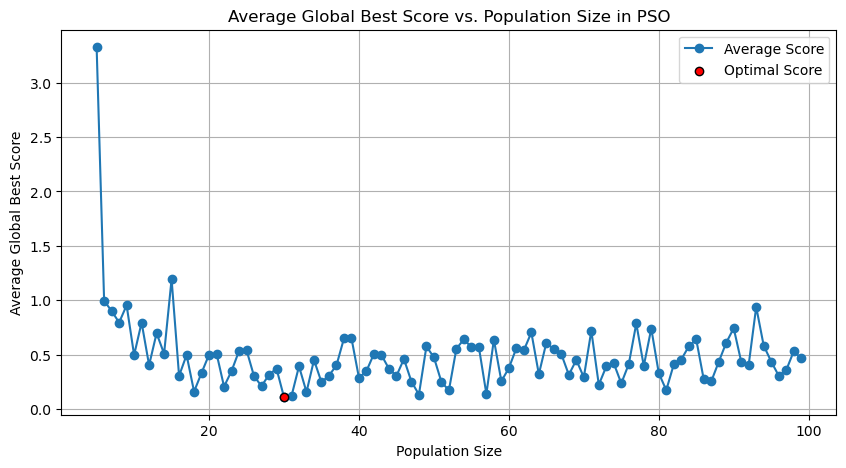

The optimal population size is 30.


In [50]:
importlib.reload(pso)

# Run the experiment and plot the results
population_sizes = np.arange(5, 100, 1)
average_global_best_scores = []

for size in population_sizes:
    global_best_scores = []
    for _ in range(10):  # Run each setup 10 times for averaging
        pso_params = pso.PSOParameters(
            particle_size=size,
            dimensions=2,
            inertia_weight=0.6,
            cognitive_constant=2.05,
            social_constant=2.05,
            function_evaluations=1000
        )
        global_best_score = pso.run_pso(pso_params)
        global_best_scores.append(global_best_score)
    
    average_global_best_scores.append(np.mean(global_best_scores))

# Find the optimal values
optimal_index = np.argmin(average_global_best_scores)
optimal_population_size = population_sizes[optimal_index]
optimal_score = average_global_best_scores[optimal_index]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(population_sizes, average_global_best_scores, marker='o', label='Average Score')
plt.scatter(optimal_population_size, optimal_score, color='red', zorder=5, label='Optimal Score', edgecolors='black')
plt.xlabel('Population Size')
plt.ylabel('Average Global Best Score')
plt.title('Average Global Best Score vs. Population Size in PSO')
plt.legend()
plt.grid(True)
plt.show()
print(f"The optimal population size is {optimal_population_size}.")

## Dependence of Optimal Population Size on Problem Complexity

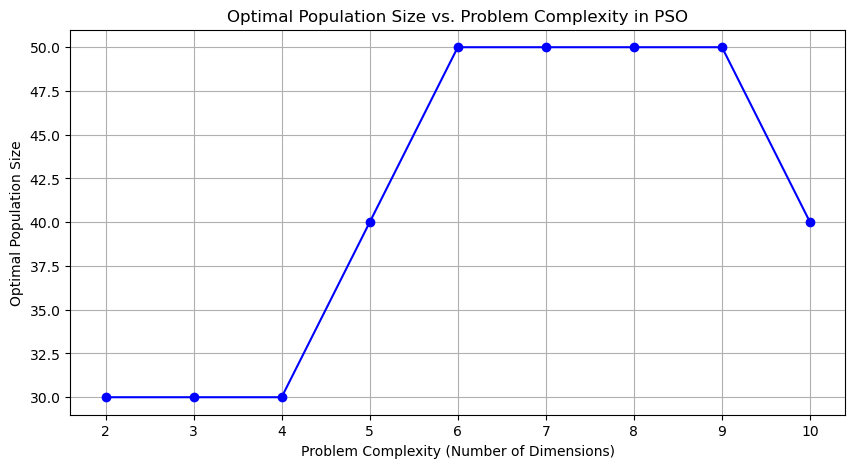

In [52]:
# Assuming rastrigin_function, PSOParameters, initialize_swarm, and run_pso are already defined

# Run the experiment for varying complexities (dimensionalities)
complexities = range(2, 11)  # Let's explore 2 to 10 dimensions
optimal_population_sizes = []

# We'll use a fixed population size range for all complexities for simplicity
population_size_range = np.arange(10, 51, 10)

for complexity in complexities:
    best_scores_for_complexity = []

    for population_size in population_size_range:
        global_best_scores = []
        for _ in range(10):  # Run each setup 10 times for averaging
            pso_params = pso.PSOParameters(
                particle_size=population_size,
                dimensions=complexity,  # Varying the complexity here
                inertia_weight=0.6,
                cognitive_constant=2.05,
                social_constant=2.05,
                function_evaluations=5000  # Increased evaluations for higher dimensions
            )
            score = pso.run_pso(pso_params)
            global_best_scores.append(score)
        
        best_scores_for_complexity.append(np.mean(global_best_scores))
    
    # Find the optimal population size for this complexity
    optimal_index = np.argmin(best_scores_for_complexity)
    optimal_population_sizes.append(population_size_range[optimal_index])

# Plotting the relationship between problem complexity and optimal population size
plt.figure(figsize=(10, 5))
plt.plot(complexities, optimal_population_sizes, marker='o', linestyle='-', color='blue')
plt.xlabel('Problem Complexity (Number of Dimensions)')
plt.ylabel('Optimal Population Size')
plt.title('Optimal Population Size vs. Problem Complexity in PSO')
plt.grid(True)
plt.show()
